# Analysis of simulation with no error rate

### One by one query genome 

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import os

os.getcwd()
os.chdir('/Users/user/Documents/OUCRU/Graph_Genome')

report = pd.read_csv("summarise.csv",sep="\t",names=['gene',"read_count","length","coverage"])

# dropping null value columns to avoid errors
report.dropna(inplace = True)

# new data frame with split value columns
new = report["gene"].str.split("_", n = 1, expand = True)

# making seperate first name column from new data frame
report["accession_id"] = new[0]

# making seperate last name column from new data frame
report["prot"] = new[1]

Short gun DNA sequence data for each reference genome is simulated from fasta file with 10000 reads. Then each of query genome is aligned to genome graph built up to check whether 

In [2]:
report.head()

,gene,read_count,length,coverage,accession_id,prot
0,AF3267542_1C,1269,726,726M,AF3267542,1C
1,AF3267542_2A,769,450,1D449M,AF3267542,2A
2,AF3267542_1B,1344,765,765M,AF3267542,1B
3,AF3267542_1A,217,207,207M,AF3267542,1A
4,AF3267542_3A,336,255,255M,AF3267542,3A


In [8]:
# 
pd.crosstab(report['accession_id'],report['prot'],margins=True)


prot,1A,1B,1C,1D,2A,2B,2C,3A,3C,3D,3Dpol,VP1,VP2,VP3,VP4,capsid,protease,All
accession_id,,,,,,,,,,,,,,,,,,
AF3267542,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,10
AF3267612,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,10
AF3267642,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,10
AY4217601,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10
AY4217611,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10
AY4217621,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10
AY4217641,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10
AY4217651,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10
AY4217661,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10


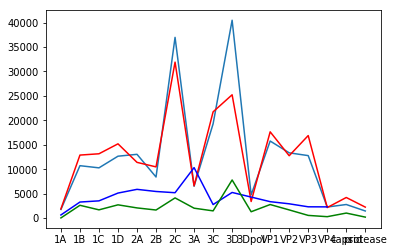

In [60]:
table = pd.crosstab(report['accession_id'],report['accession_id'],margins=False)
mpl.plot(report.groupby(['prot']).sum()['read_count'])#,report.groupby(['accession_id']).sum()['read_count'])
mpl.plot(report3.groupby(['prot']).sum()['read_count'],color="red")#,report.groupby(['accession_id']).sum()['read_count'])
mpl.plot(report4.groupby(['prot']).sum()['read_count'],color="blue")
mpl.plot(report5.groupby(['prot']).sum()['read_count'],color="green")

### Mixture of 4 query genomes

In [61]:
mix1 = pd.read_csv("mixture1.csv",sep="\t",names=['gene',"read_count","length","coverage"])
# dropping null value columns to avoid errors
mix1.dropna(inplace = True)

# new data frame with split value columns
new = mix1["gene"].str.split("_", n = 1, expand = True)

# making seperate first name column from new data frame
mix1["accession_id"] = new[0]

# making seperate last name column from new data frame
mix1["prot"] = new[1]
mix1.head()

,gene,read_count,length,coverage,accession_id,prot
0,KU3558771_protease,711,450,450M,KU3558771,protease
1,AF3267642_1D,1578,873,873M,AF3267642,1D
2,KU3558771_2C,1897,987,1D986M,KU3558771,2C
3,AF3267612_2C,1898,987,987M,AF3267612,2C
4,KU3558761_capsid,1301,765,1D764M,KU3558761,capsid


### Mixture of 17 contamination genomes and 4 query genomes

Under this simulation case, 17 common contamination genomes are simulated with 10000 reads, no error and mutation rate and each read has length 100 bp. First, sample with 17 contamination genomes only are aligned by running this pipeline, result is as expected, no detection.

Then create new sample include these 17 contamination genomes and 4 query genomes above and run pipeline again. Result is displayed in table below. All 4 query genomes are subtyped correctly and same as sample contains only these 4 query genomes above.

In [18]:
mix2 = pd.read_csv("mixture2.csv",sep="\t",names=['gene',"read_count","length","coverage"])
# dropping null value columns to avoid errors
mix2.dropna(inplace = True)

# new data frame with split value columns
new = mix2["gene"].str.split("_", n = 1, expand = True)

# making seperate first name column from new data frame
mix2["accession_id"] = new[0]

# making seperate last name column from new data frame
mix2["prot"] = new[1]
mix2.head()

,gene,read_count,length,coverage,accession_id,prot
0,KU3558761_3A,320,258,258M,KU3558761,3A
1,AF3267612_1A,212,207,207M,AF3267612,1A
2,KU3558771_2C,1897,987,1D986M,KU3558771,2C
3,AF3267642_3D,2413,1386,1386M,AF3267642,3D
4,AF3267612_3D,2329,1386,1386M,AF3267612,3D


#### False detection

The number of mature peptides detected for each species is shown below. There is no false dicovery between subtypes.

In [16]:
table1 = pd.crosstab(mix1['accession_id'],mix2['accession_id'],margins=False)
table1

accession_id,AF3267612,AF3267642,KU3558761,KU3558771
accession_id,,,,
AF3267612,10,0,0,0
AF3267642,0,10,0,0
KU3558761,0,0,7,0
KU3558771,0,0,0,7


# Analysis of simulation with error and mutation rate

### One by one query genome

Error rate due to sequencing technology as well as mutation rate of viruses are taken into account when simulating the NGS data. Under this situation, three values of error rate and mutation rate at 0.1\%, 0.5\% and 1\%, respectively are used for simulated results. Results from these cases are compared to see how pipeline's performance in subtyping

In [62]:
report4 = pd.read_csv("summarise3.csv",sep="\t",names=['gene',"read_count","length","coverage"])

# dropping null value columns to avoid errors
report4.dropna(inplace = True)

# new data frame with split value columns
new = report4["gene"].str.split("_", n = 1, expand = True)

# making seperate first name column from new data frame
report4["accession_id"] = new[0]

# making seperate last name column from new data frame
report4["prot"] = new[1]

report4.head()

,gene,read_count,length,coverage,accession_id,prot
0,AF3267542_3C,1302,549,549M,AF3267542,3C
1,AF3267542_1A,366,207,207M,AF3267542,1A
2,AF3267542_2A,1286,450,450M,AF3267542,2A
3,AF3267542_1C,1923,726,726M,AF3267542,1C
4,AF3267542_3A,570,255,255M,AF3267542,3A


The result with mutation rate at 0.1\% and error rate are shown below. Number of mature peptides detected by this pipeline, compared to first case with 0\% mutation and error rate, is decreased from 193 to 176.

In [63]:
pd.crosstab(report2['accession_id'],report2['prot'],margins=True)

prot,1A,1B,1C,1D,2A,2B,2C,3A,3C,3D,3Dpol,VP1,VP2,VP3,VP4,capsid,protease,All
accession_id,,,,,,,,,,,,,,,,,,
AF3267542,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,9
AF3267612,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,10
AF3267642,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,9
AY4217601,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,9
AY4217611,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10
AY4217621,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,8
AY4217641,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,10
AY4217651,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,0,9
AY4217661,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1,0,0,9


Figure below shows the number of mature peptides detected by the pipeline for each query genome. As we can see, if there is 0.1\% mutation rate happen in whole genome, all species are still subtyped but there is decreas number of genes are subtyped.

All cases with different values of mutation rate and error rate are shown is figure below. The higher mutation rate or error rate, the lower the number of mature peptide of each query genome are detected. Especially, when the mutation rate is 1\% and error rate at 3\%, there are some species are not detected

Under this situation, there is no false detection also.

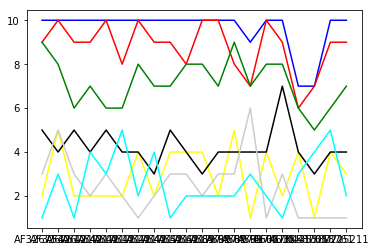

In [68]:
mpl.plot(report.groupby(['accession_id']).count()['prot'],color="blue")

mpl.plot(report2.groupby(['accession_id']).count()['prot'],color="red")

mpl.plot(report3.groupby(['accession_id']).count()['prot'],color="green")

mpl.plot(report4.groupby(['accession_id']).count()['prot'],color="yellow")

mpl.plot(report5.groupby(['accession_id']).count()['prot'],color="black")

mpl.plot(report6.groupby(['accession_id']).count()['prot'],color=".8")

mpl.plot(report7.groupby(['accession_id']).count()['prot'],color="cyan")



In [29]:
table2 = pd.crosstab(report2['accession_id'],report2['accession_id'],margins=False)
table2.head()

accession_id,AF3267542,AF3267612,AF3267642,AY4217601,AY4217611,AY4217621,AY4217641,AY4217651,AY4217661,AY4217681,AY4217691,AY6974581,AY6974591,AY6974601,AY6974611,EF6673441,KU3558761,KU3558771,U058761,U225211
accession_id,,,,,,,,,,,,,,,,,,,,
AF3267542,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AF3267612,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AF3267642,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AY4217601,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AY4217611,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Below result is from simulated with 1\% error rate and 1\% mutation rate for each of query genome, then each sample will run under the pipeline.

In [67]:
report4 = pd.read_csv("summarise4.csv",sep="\t",names=['gene',"read_count","length","coverage"])

# dropping null value columns to avoid errors
report4.dropna(inplace = True)

# new data frame with split value columns
new = report4["gene"].str.split("_", n = 1, expand = True)

# making seperate first name column from new data frame
report4["accession_id"] = new[0]

# making seperate last name column from new data frame
report4["prot"] = new[1]

report4.head()

,gene,read_count,length,coverage,accession_id,prot
0,AF3267542_1C,1692,726,726M,AF3267542,1C
1,AF3267542_3D,2329,1386,435M1D950M,AF3267542,3D
2,AF3267612_1A,325,207,207M,AF3267612,1A
3,AF3267612_2B,629,297,297M,AF3267612,2B
4,AF3267612_2A,283,450,300M1D149M,AF3267612,2A


In [70]:
table4 = pd.crosstab(report4['accession_id'],report4['accession_id'],margins=False)
table4

accession_id,AF3267542,AF3267612,AF3267642,AY4217601,AY4217611,AY4217621,AY4217641,AY4217651,AY4217661,AY4217681,AY4217691,AY6974581,AY6974591,AY6974601,AY6974611,EF6673441,KU3558761,KU3558771,U058761,U225211
accession_id,,,,,,,,,,,,,,,,,,,,
AF3267542,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AF3267612,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AF3267642,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AY4217601,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AY4217611,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AY4217621,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AY4217641,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
AY4217651,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
AY4217661,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0


Subtypes are still detected when error rate at 3\% based on mature peptides detected. However, this can't be confirmed that which virus is presented in the sample due to homogeneity. The graph is constructed by viruses of interest only, thus, all other species or strains which might be contain same mature peptides not covered in the graph library could be potential species.

In [73]:
table7 = pd.crosstab(report7['accession_id'],report7['accession_id'],margins=True)
table7

accession_id,AF3267542,AF3267612,AF3267642,AY4217601,AY4217611,AY4217621,AY4217641,AY4217651,AY4217661,AY4217681,AY6974581,AY6974591,AY6974601,AY6974611,EF6673441,KU3558761,U058761,U225211,All
accession_id,,,,,,,,,,,,,,,,,,,
AF3267542,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
AF3267612,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
AF3267642,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
AY4217601,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
AY4217611,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3
AY4217621,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,5
AY4217641,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2
AY4217651,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4
AY4217661,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
